In [21]:
import pandas as pd
f1 = pd.read_csv("n8n_game_data - Video_Games.csv")

In [24]:
f1

,id,metadata,problem,answer,topic,category,answer_type,urls,model_a_response,model_a_src,...,model_c_src,mode_c_search_response,model_d_response,model_d_src,model_d_search_response,model_e_response,model_e_src,model_e_search_response,conclusion,correct_models
0,1.0,"{'topic': 'Video games', 'answer_type': 'Other...",What version of Dota 2 was The International 2...,6.88b,Video games,Patches and Updates,Other,['https://liquipedia.net/dota2/The_Internation...,The International 2016 was played on Dota 2 ve...,"[""https://liquipedia.net/dota2/The_Internation...",...,"[""https://liquipedia.net/dota2/The_Internation...",Detailed Results:\n\nTitle: The International ...,The International 2016 (TI6) was played on Dot...,"[""https://liquipedia.net/dota2/The_Internation...",Title: The International 2016 - Liquipedia Dot...,The International 2016 was played on Dota 2 ve...,"[""https://liquipedia.net/dota2/The_Internation...","results=[LinkupSearchTextResult(type='text', n...","{""final_conclusion"":{""correct_models"":[""A"",""E""...","[""A"",""E""]"
1,2.0,"{'topic': 'Video games', 'answer_type': 'Date'...",What patch removed the Silver Armor from the c...,1.1,Video games,Patches and Updates,Date,"['https://terraria.wiki.gg/wiki/Silver_armor',...",The Silver Armor requirement for crafting Jung...,"[""https://terraria.wiki.gg/wiki/Jungle_armor""]",...,"[""https://terraria.fandom.com/wiki/Silver_armo...",Detailed Results:\n\nTitle: Silver armor - Ter...,The patch that removed the Silver Armor from t...,"[""https://terraria-archive.fandom.com/wiki/Jun...",Title: Jungle Armor | Terraria Wiki | Fandom\n...,The patch that removed Silver Armor from the c...,"[""https://terraria.fandom.com/wiki/Jungle_armo...","results=[LinkupSearchTextResult(type='text', n...","{""final_conclusion"":{""correct_models"":[""A""],""j...","[""A""]"
2,3.0,"{'topic': 'Video games', 'answer_type': 'Numbe...",How many DLCs were released for Elder Scrolls ...,3,Video games,Numerical Stats and Attributes,Number,['https://en.wikipedia.org/wiki/The_Elder_Scro...,"As of December 5, 2012, three DLCs had been re...","[""https://en.wikipedia.org/wiki/The_Elder_Scro...",...,"[""https://www.ign.com/wikis/the-elder-scrolls-...",Detailed Results:\n\nTitle: DLC & Patches - Th...,"As of December 5, 2012, three DLCs were releas...","[""https://en.wikipedia.org/wiki/The_Elder_Scro...","A ""Legendary Edition"" was released on June 4, ...","As of December 5, 2012, three DLCs were releas...","[""https://tvtropes.org/pmwiki/pmwiki.php/Video...","The first downloadable add-on for Skyrim, Dawn...","{""final_conclusion"":{""correct_models"":[""A"",""B""...","[""A"",""B"",""C"",""D"",""E""]"
3,4.0,"{'topic': 'Video games', 'answer_type': 'Perso...",Which companion can Josephine develop feelings...,Blackwall,Video games,People and Characters,Person,['https://dragonage.fandom.com/wiki/Josephine_...,"Josephine Montilyet, an advisor in Dragon Age:...","[""https://fextralife.com/forums/t158626/spoile...",...,"[""https://fextralife.com/forums/t158626/spoile...",Detailed Results:\n\nTitle: (Spoilers) Relatio...,Josephine can develop feelings for the Inquisi...,"[""https://dragonage.fandom.com/wiki/Josephine_...",\nTitle: Dragon Age: Inquisition Romance guide...,"In Dragon Age: Inquisition (2014), Josephine M...","[""https://dragonage.fandom.com/wiki/Josephine_...","LinkupSearchTextResult(type='text', name='Jose...","{""integrated_concise_answer"":""In Dragon Age: I...","[""A"",""C""]"
4,5.0,"{'topic': 'Video games', 'answer_type': 'Date'...","Specify the exact day, month, and year Capcom ...",2 Nov 2020,Video games,Dates and Events,Date,"['https://en.wikipedia.org/wiki/Capcom', 'http...",Capcom reported that its servers were affected...,"[""https://www.computerweekly.com/news/25249213...",...,"[""https://cyberscoop.com/capcom-ransomware-dat...",Title: Video game company Capcom details attac...,Capcom reported the ransomware attack by the R...,"[""https://cyberscoop.com/capcom-ransomware-dat...",Titl

In [7]:
f2 = f1.loc[:,["problem","category","answer_type","correct_models"]].dropna()

In [10]:
f2.correct_models = f2["correct_models"].map(eval)

In [14]:
f2.correct_models

0               [A, E]
1                  [A]
2      [A, B, C, D, E]
3               [A, C]
4               [D, E]
            ...       
129       [A, C, D, E]
130          [A, D, E]
131       [A, C, D, E]
133                [C]
134       [A, C, D, E]
Name: correct_models, Length: 134, dtype: object

In [12]:
f2.correct_models[0]

['A', 'E']

In [13]:
f2.correct_models.explode().value_counts()

correct_models
A          112
E           91
C           81
D           77
B           26
None         2
Model A      1
none         1
Name: count, dtype: int64

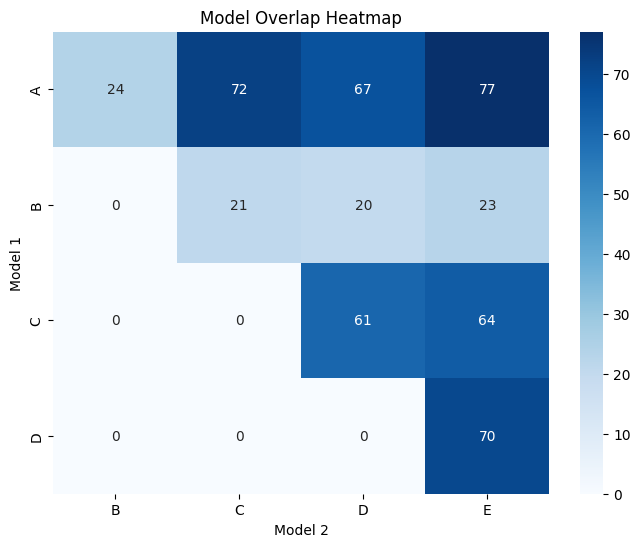

  Model 1 Model 2  Count
0       A       E     77
2       A       C     72
9       D       E     70
3       A       D     67
8       C       E     64
7       C       D     61
1       A       B     24
6       B       E     23
4       B       C     21
5       B       D     20


In [15]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Assuming f2.correct_models is your Series of lists
# Step 1: Normalize entries to uppercase and filter out bad entries
f2['correct_models'] = f2['correct_models'].apply(
    lambda x: [str(i).strip().upper() for i in x if str(i).strip().upper() in ['A', 'B', 'C', 'D', 'E']]
)

# Step 2: Count pairwise co-occurrences
pair_counter = Counter()

for models in f2['correct_models']:
    unique_models = sorted(set(models))  # remove duplicates in the list if any
    for pair in combinations(unique_models, 2):
        pair_counter[pair] += 1

# Step 3: Convert to DataFrame for display
overlap_df = pd.DataFrame([
    {"Model 1": a, "Model 2": b, "Count": count}
    for (a, b), count in pair_counter.items()
]).sort_values(by="Count", ascending=False)

# Display top overlapping model pairs
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Heatmap of overlaps
pivot_table = overlap_df.pivot(index="Model 1", columns="Model 2", values="Count").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Model Overlap Heatmap")
plt.show()

# Also print top results
print(overlap_df.head(10))


In [26]:
import pandas as pd
from itertools import combinations
from collections import defaultdict

# Normalize
valid_models = {'A', 'B', 'C', 'D', 'E'}
f2['correct_models'] = f2['correct_models'].apply(
    lambda x: [str(i).strip().upper() for i in x if str(i).strip().upper() in valid_models]
)

# Prepare result dictionary
comparison_results = []

# Generate all pairs
model_list = sorted(valid_models)
model_pairs = list(combinations(model_list, 2))

# Count per model pair
for model1, model2 in model_pairs:
    only_m1 = 0
    only_m2 = 0
    both = 0
    neither = 0

    for models in f2['correct_models']:
        models_set = set(models)
        m1 = model1 in models_set
        m2 = model2 in models_set

        if m1 and m2:
            both += 1
        elif m1 and not m2:
            only_m1 += 1
        elif not m1 and m2:
            only_m2 += 1
        else:
            neither += 1

    comparison_results.append({
        'Model 1': model1,
        'Model 2': model2,
        'Only Model 1 Correct': only_m1,
        'Only Model 2 Correct': only_m2,
        'Both Correct': both,
        'Neither Correct': neither
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values(by="Both Correct", ascending=False)

comparison_df

,Model 1,Model 2,Only Model 1 Correct,Only Model 2 Correct,Both Correct,Neither Correct
3,A,E,35,14,77,8
1,A,C,40,9,72,13
9,D,E,7,21,70,36
2,A,D,45,10,67,12
8,C,E,17,27,64,26
7,C,D,20,16,61,37
0,A,B,88,2,24,20
6,B,E,3,68,23,40
4,B,C,5,60,21,48
5,B,D,6,57,20,51


In [16]:
# Clean up the entries again (just in case)
valid_models = {'A', 'B', 'C', 'D', 'E'}
f2['correct_models_clean'] = f2['correct_models'].apply(
    lambda x: [str(i).strip().upper() for i in x if str(i).strip().upper() in valid_models]
)

# Find rows where only one model was correct
only_one_model_df = f2['correct_models_clean'].apply(lambda x: tuple(x) if len(x) == 1 else None).dropna()

# Count how many times each single model was the only correct one
only_one_model_counts = only_one_model_df.value_counts().rename_axis('Only Model').reset_index(name='Count')

print(only_one_model_counts)


  Only Model  Count
0       (A,)     17
1       (E,)      3
2       (C,)      2
3       (B,)      1


In [ ]:
service.yaml